In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
data_2d = pd.read_csv('data_2d.csv').values
data_2d

array([[ 0.00000000e+00,  2.68784756e+00,  2.36696066e+00],
       [ 0.00000000e+00, -2.01379356e-01,  4.70429935e-01],
       [ 0.00000000e+00,  6.08495680e-01,  1.22540003e+00],
       [ 0.00000000e+00, -8.22819045e-02,  1.13721812e+00],
       [ 0.00000000e+00,  2.08306930e+00,  2.69448209e+00],
       [ 0.00000000e+00,  1.50301985e+00,  1.07484727e+00],
       [ 0.00000000e+00,  3.91662001e-01, -2.87497166e-01],
       [ 0.00000000e+00,  3.21377111e-01,  1.29674301e+00],
       [ 0.00000000e+00,  5.91248258e-01,  1.26716412e-01],
       [ 0.00000000e+00,  1.15057763e+00, -2.66403844e-01],
       [ 0.00000000e+00,  9.42586669e-01,  8.67662423e-01],
       [ 0.00000000e+00,  1.35780613e+00,  1.80547155e+00],
       [ 0.00000000e+00,  1.16291991e+00,  2.62243013e+00],
       [ 0.00000000e+00, -9.78685124e-02,  1.01230581e+00],
       [ 0.00000000e+00,  8.57774175e-01,  1.03196525e+00],
       [ 0.00000000e+00,  6.83436732e-01,  1.57813996e-02],
       [ 0.00000000e+00,  1.54377185e+00

In [3]:
inertia_2d = []
for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto')
    kmeans.fit(data_2d)
    inertia_2d.append(kmeans.inertia_)

Text(0, 0.5, 'Silhouette Score')

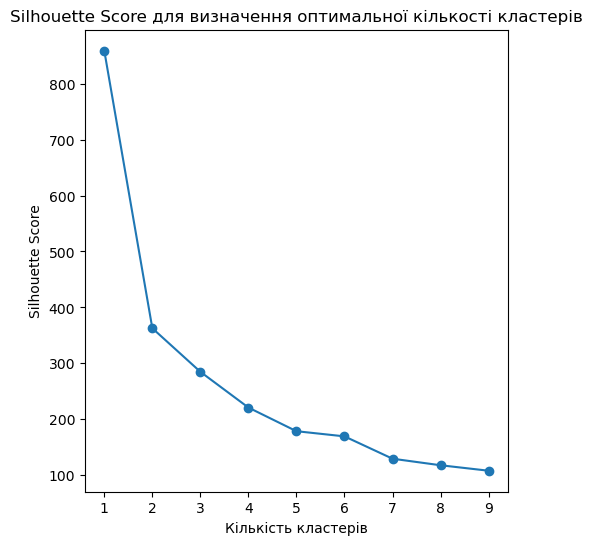

In [4]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 10), inertia_2d, marker='o')
plt.title('Silhouette Score для визначення оптимальної кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Silhouette Score')

In [5]:
kmeans_2d = KMeans(n_clusters=2, n_init='auto')  
kmeans_2d.fit(data_2d)
labels = kmeans_2d.labels_

Text(0, 0.5, 'Feature 2')

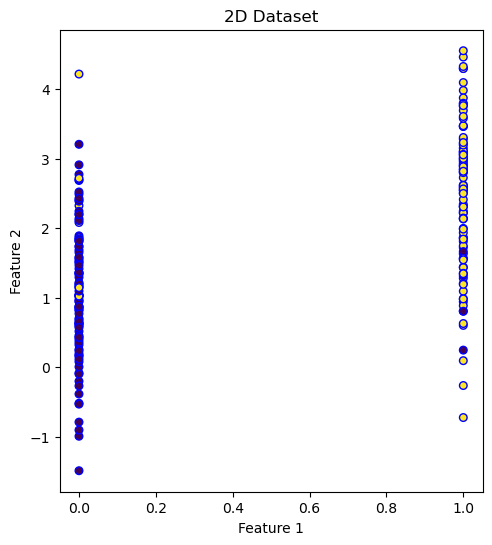

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', edgecolors='b', s=30)
plt.title('2D Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [8]:
mnist = pd.read_csv('mnist.csv')
mnist_data = pd.DataFrame(mnist/255.0).values
mnist_data

array([[0.00784314, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00392157, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01568627, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02352941, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [9]:
kmeans_mnist = KMeans(n_clusters=10, n_init=10, random_state=42)

inertia_mnist = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, verbose=0)
    kmeans.fit(mnist_data)
    inertia_mnist.append(kmeans.inertia_)

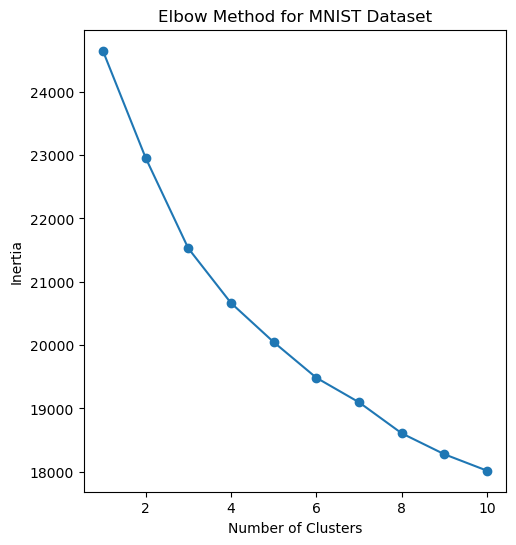

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), inertia_mnist, marker='o')
plt.title('Elbow Method for MNIST Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.show()

In [11]:
pca = PCA(n_components=2)
mnist_pca = pca.fit_transform(mnist_data)
kmeans_mnist = KMeans(n_clusters=5, n_init='auto')
kmeans_mnist.fit(mnist_pca)
labels_mnist = kmeans_mnist.labels_

AttributeError: 'DataFrame' object has no attribute 'cluster_centers_'

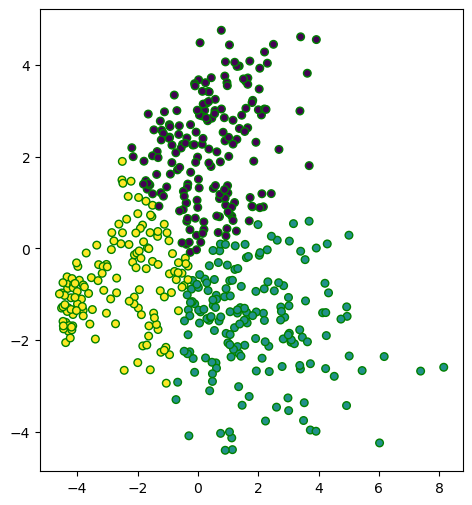

In [13]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(mnist_pca[:, 0], mnist_pca[:, 1], c=labels_mnist, cmap='viridis', edgecolors='b', s=30)
plt.title('MNIST Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()